In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
dados_originais = pd.read_csv("C:\\Users\\herli\\Documents\\RBRAS 2023\\trabalho\\TG\\Dados\\DADOS_ORIGINAIS.TXT" , sep='\t')

In [13]:
dados_originais.head()

,DTATUAL,TPCLIENT,LOCALIZA,TPEMPREG,SEXO,DTNASCI,ESTCIVIL,SITRESID,LIMITE,TEMPORES,REGIAO,CEP,PROFISSAO,MAU,TEMPO
0,150103,2,86,0,F,211077,S,P,65,1,5,4,1,0,12
1,200103,2,323,19,M,241280,S,P,70,21,14,93,50,0,12
2,200103,1,323,80,F,41078,S,P,112,10,14,94,3,1,12
3,210103,1,323,226,F,121238,V,P,65,18,14,93,51,0,12
4,170103,1,323,120,F,60251,V,P,98,30,14,93,3,0,12


O dicionário dos dados é:

| Variável | Descrição |
|----|---|
| DTATUAL | Data da observação das variáveis |
| TPCLIENT | Indica se é cliente há mais de um ano (dicotômica). Valores: 2=Sim, 1=Não |
| LOCALIZA | Sem descrição disponível |
|TPEMPREG | Tempo que o cliente está no atual emprego (em meses)|
| SEXO | Sexo|
| DTNASC | Data de nascimento |
|ESTCIVIL | Estado civil|
| SITRESID | Condição da residência: própria ou alugada |
|LIMITE | Valor do crédito concedido (em reais) |
|TEMPORES | Tempo de residência na casa atual (em anos) |
| REGIAO | Sem descrição disponível |
|CEP | Os dois primeiros dígitos do CEP |
| PROFISSAO | Sem descricao disponível |
|MAU | Variável resposta: 0 – bom pagador, 1 – mau pagador |
|TEMPO | Tempo entre o pedido de empréstimo até a indadimplência |

A variável TEMPO e DTATUAL não ajudam a prever se ocorrerá a perda. Assim foram descartadas.
DTNASCI também é descartada após ser gerada a variável ANONASCI, que descreve o ano de nascimento. Que nesse caso é equivalente a uma variável calculada de IDADE uma vez que todos os clientes nasceram entre 1900 e 1999.

Observa-se ainda que as variáveis categóricas são: TPCLIENT , LOCALIZA, SEXO, ESTCIVIL, SITRESID, REGIAO, CEP, PROFISSAO

As contínuas são: TPEMPREG , ANONASCI , LIMITE , TEMPORES

In [31]:
dados = dados_originais.drop(columns=['DTATUAL','TEMPO'])

In [43]:
dados['ANONASCI'] = dados['DTNASCI'].apply(lambda x: str(x)[-2:]).astype(int)

In [45]:
dados = dados.drop(columns=['DTNASCI'])

---
### Análise exploratória e de discretização das covariáveis

- TPCLIENT:

<Axes: xlabel='TPCLIENT', ylabel='count'>

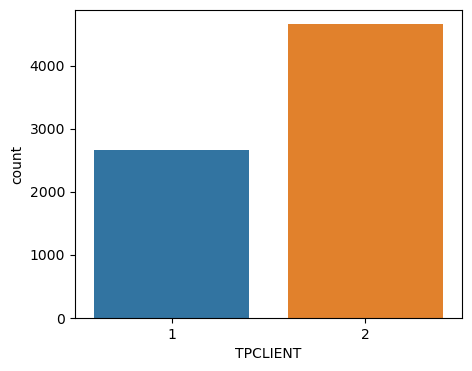

In [189]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['TPCLIENT'], ax=ax )

In [190]:
pd.crosstab( dados['TPCLIENT'] , dados['MAU'], normalize='index')

MAU,0,1
TPCLIENT,,
1,0.622514,0.377486
2,0.737701,0.262299


---
- LOCALIZA:
    

<Axes: xlabel='LOCALIZA', ylabel='count'>

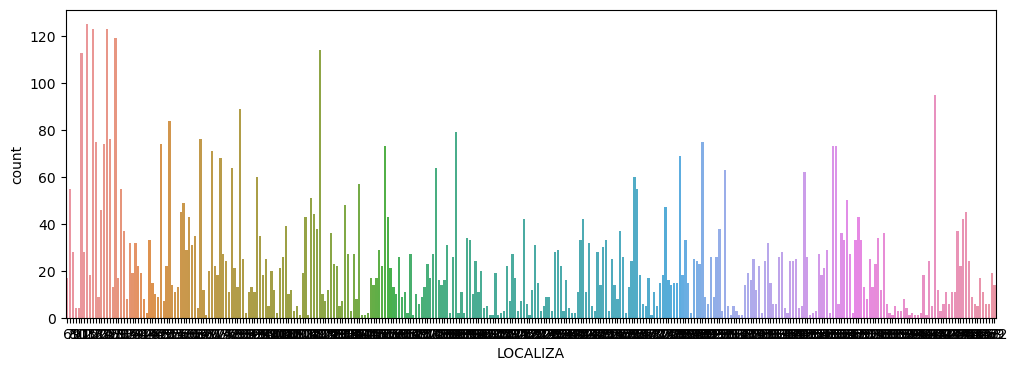

In [192]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(  x= dados['LOCALIZA'], ax=ax )

Nota-se que a feature é categórica com muitos níveis.

In [194]:
pd.crosstab( dados['LOCALIZA'] , dados['MAU'], normalize='index').sort_values(by=1)

MAU,0,1
LOCALIZA,,
219,1.0,0.0
341,1.0,0.0
337,1.0,0.0
319,1.0,0.0
318,1.0,0.0
...,...,...
393,0.0,1.0
164,0.0,1.0
414,0.0,1.0


In [195]:
pd.crosstab( dados['LOCALIZA'] , dados['MAU'], normalize='index').sort_values(by=1).index

Int64Index([219, 341, 337, 319, 318, 314, 312,  68, 144, 270,
            ...
            311, 380, 278, 367, 201, 393, 164, 414, 200, 205],
           dtype='int64', name='LOCALIZA', length=328)

In [197]:
grupo1_loca = pd.crosstab( dados['LOCALIZA'] , dados['MAU'], normalize='index').sort_values(by=1).index[:110]
grupo2_loca = pd.crosstab( dados['LOCALIZA'] , dados['MAU'], normalize='index').sort_values(by=1).index[110:220]
grupo3_loca = pd.crosstab( dados['LOCALIZA'] , dados['MAU'], normalize='index').sort_values(by=1).index[220:]

In [198]:
dados.loc[ dados['LOCALIZA'].isin( grupo1_loca ) , "LOCALIZA2"] = 0
dados.loc[ dados['LOCALIZA'].isin( grupo2_loca ) , "LOCALIZA2"] = 1
dados.loc[ dados['LOCALIZA'].isin( grupo3_loca ) , "LOCALIZA2"] = 2

<Axes: xlabel='LOCALIZA2', ylabel='count'>

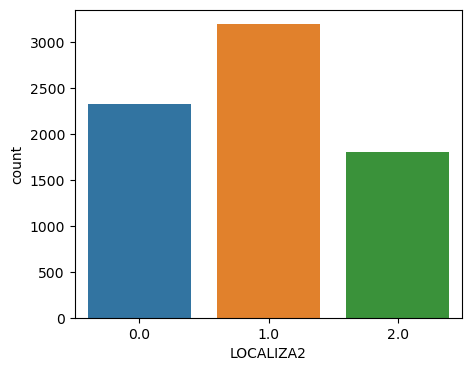

In [200]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['LOCALIZA2'], ax=ax )

In [201]:
pd.crosstab( dados['LOCALIZA2'] , dados['MAU'], normalize='index')

MAU,0,1
LOCALIZA2,,
0.0,0.816616,0.183384
1.0,0.696742,0.303258
2.0,0.538504,0.461496


---
- SEXO:
    

<Axes: xlabel='SEXO', ylabel='count'>

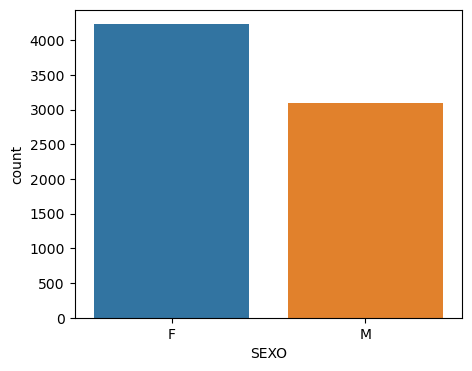

In [203]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['SEXO'], ax=ax )

In [204]:
pd.crosstab( dados['SEXO'] , dados['MAU'], normalize='index')

MAU,0,1
SEXO,,
F,0.722800,0.277200
M,0.658797,0.341203


---
- ESTCIVIL:

<Axes: xlabel='ESTCIVIL', ylabel='count'>

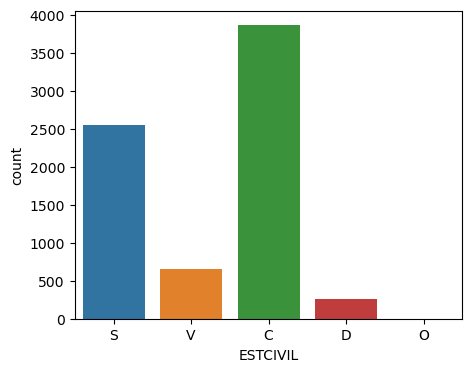

In [205]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['ESTCIVIL'], ax=ax )

In [206]:
pd.crosstab( dados['ESTCIVIL'] , dados['MAU'], normalize='index')

MAU,0,1
ESTCIVIL,,
C,0.726825,0.273175
D,0.700389,0.299611
O,1.000000,0.000000
S,0.632075,0.367925
V,0.757669,0.242331


In [214]:
dados.loc[ dados['ESTCIVIL'].isin(['S']) , "ESTCIVIL2" ] = 0
dados.loc[ dados['ESTCIVIL'].isin(['C','D']) , "ESTCIVIL2" ] = 1
dados.loc[ dados['ESTCIVIL'].isin(['V','O']) , "ESTCIVIL2" ] = 2

---
- SITRESID:

<Axes: xlabel='SITRESID', ylabel='count'>

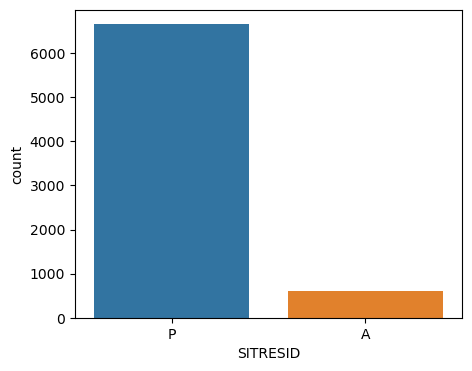

In [208]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['SITRESID'], ax=ax )

In [209]:
pd.crosstab( dados['SITRESID'] , dados['MAU'], normalize='index')

MAU,0,1
SITRESID,,
A,0.630363,0.369637
P,0.703442,0.296558


---
- ANONASCI:

<Axes: xlabel='ANONASCI', ylabel='count'>

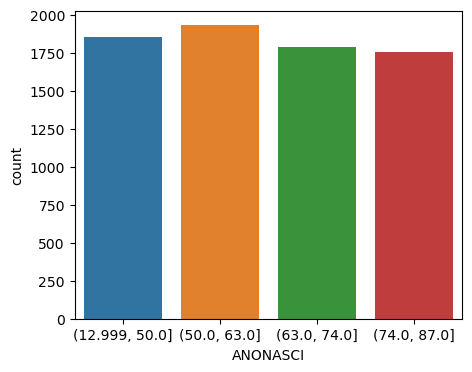

In [150]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.qcut(dados['ANONASCI'], 4), ax=ax )

In [151]:
pd.crosstab( pd.qcut(dados['ANONASCI'], 4) , dados['MAU'], normalize='index')

MAU,0,1
ANONASCI,,
"(12.999, 50.0]",0.811117,0.188883
"(50.0, 63.0]",0.730430,0.269570
"(63.0, 74.0]",0.689983,0.310017
"(74.0, 87.0]",0.541405,0.458595


Regra de discretização:
- Faz sentido manter os quatro grupos discretizados pela diferença na taxa de maus de cada grupo.

In [244]:
dados['ANONASCI2'] = pd.qcut(dados['ANONASCI'], 4)

---
- TPEMPREG:

<Axes: xlabel='TPEMPREG', ylabel='count'>

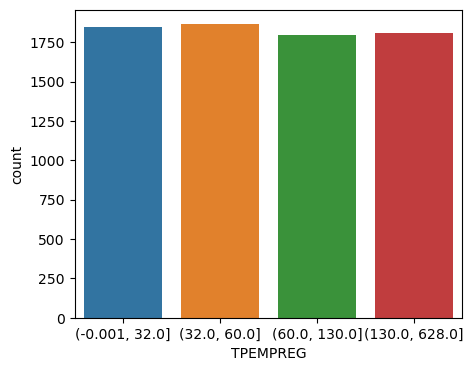

In [152]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.qcut(dados['TPEMPREG'], 4), ax=ax )

In [65]:
pd.crosstab( pd.qcut(dados['TPEMPREG'], 4) , dados['MAU'],normalize='index')

MAU,0,1
TPEMPREG,,
"(-0.001, 32.0]",0.572432,0.427568
"(32.0, 60.0]",0.682403,0.317597
"(60.0, 130.0]",0.735114,0.264886
"(130.0, 628.0]",0.796573,0.203427


Regra de discretização:
- É razoável manter 3 grupos (agrupando os grupos (32.0, 60.0] e (60.0, 130.0]) pela diferença na taxa de maus

**Intervalos finais**: [(-0.001, 32.0] < (32.0, 130.0] < (130.0, 628.0]] 



<Axes: xlabel='TPEMPREG', ylabel='count'>

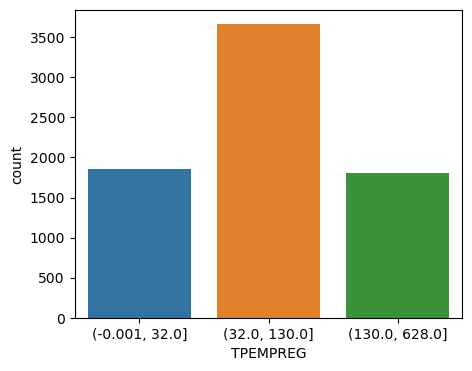

In [161]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.cut(dados['TPEMPREG'], pd.IntervalIndex.from_tuples([(-0.001,32.),(32.,130.),(130.,628.)])  ), ax=ax )

In [164]:
pd.crosstab( pd.cut(dados['TPEMPREG'], pd.IntervalIndex.from_tuples([(-0.001,32.),(32.,130.),(130.,628.)])), dados['MAU'],normalize='index')

MAU,0,1
TPEMPREG,,
"(-0.001, 32.0]",0.572432,0.427568
"(32.0, 130.0]",0.708276,0.291724
"(130.0, 628.0]",0.796573,0.203427


In [217]:
dados['TPEMPREG2'] = pd.cut(dados['TPEMPREG'], pd.IntervalIndex.from_tuples([(-0.001,32.),(32.,130.),(130.,628.)]))

---

- LIMITE:

<Axes: xlabel='LIMITE', ylabel='count'>

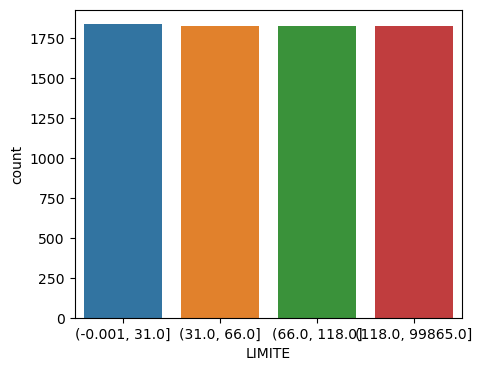

In [165]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.qcut(dados['LIMITE'], 4), ax=ax )

In [153]:
pd.crosstab( pd.qcut(dados['LIMITE'], 4) , dados['MAU'],normalize='index')

MAU,0,1
LIMITE,,
"(-0.001, 31.0]",0.633097,0.366903
"(31.0, 66.0]",0.672149,0.327851
"(66.0, 118.0]",0.724590,0.275410
"(118.0, 99865.0]",0.753417,0.246583


Regra de discretização:
- É razoável manter 3 grupos (agrupando os grupos (31.0, 66.0] e (66.0, 118.0]) pela diferença na taxa de maus

**Intervalos finais**: [(-0.001, 31.0] < (31.0, 118.0] < (118., 99865.0]] 

<Axes: xlabel='LIMITE', ylabel='count'>

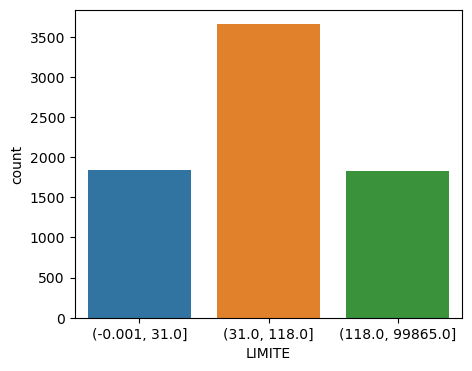

In [166]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.cut(dados['LIMITE'], pd.IntervalIndex.from_tuples([(-0.001, 31.0),(31.0, 118.0),(118., 99865.0)])  ), ax=ax )

In [167]:
pd.crosstab( pd.cut(dados['LIMITE'], pd.IntervalIndex.from_tuples([(-0.001, 31.0),(31.0, 118.0),(118., 99865.0)])  ) , dados['MAU'],normalize='index')

MAU,0,1
LIMITE,,
"(-0.001, 31.0]",0.633097,0.366903
"(31.0, 118.0]",0.698413,0.301587
"(118.0, 99865.0]",0.753417,0.246583


In [224]:
dados['LIMITE2'] = pd.cut(dados['LIMITE'], pd.IntervalIndex.from_tuples([(-0.001, 31.0),(31.0, 118.0),(118., 99865.0)])  )

---
- TEMPORES:

In [ ]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.qcut(dados['TEMPORES'], 4), ax=ax )

In [171]:
pd.crosstab( pd.qcut(dados['TEMPORES'], 4) , dados['MAU'],normalize='index')

MAU,0,1
TEMPORES,,
"(-0.001, 2.0]",0.666847,0.333153
"(2.0, 8.0]",0.679156,0.320844
"(8.0, 15.0]",0.710682,0.289318
"(15.0, 70.0]",0.731017,0.268983


Regra de discretização:
- É razoável manter 2 grupos (agrupando os grupos (2.0, 8.0] e (8.0, 15.0]) pela diferença na taxa de maus

**Intervalos finais**: [(-0.001, 4.0] < (4.0, 15.0] < (15.0, 70.0]]

<Axes: xlabel='TEMPORES', ylabel='count'>

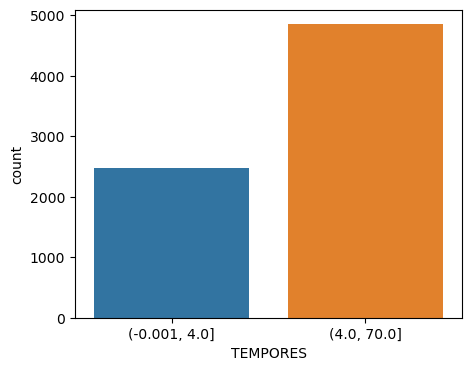

In [236]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= pd.cut(dados['TEMPORES'], pd.IntervalIndex.from_tuples([(-0.001, 4.0),(4.0, 70.0)])  ), ax=ax )

In [235]:
pd.crosstab( pd.cut(dados['TEMPORES'], pd.IntervalIndex.from_tuples([(-0.001, 4.0),(4.0, 70.0)])  ) , dados['MAU'],normalize='index')

MAU,0,1
TEMPORES,,
"(-0.001, 4.0]",0.669632,0.330368
"(4.0, 70.0]",0.709098,0.290902


In [237]:
dados['TEMPORES2'] = pd.cut(dados['TEMPORES'], pd.IntervalIndex.from_tuples([(-0.001, 4.0),(4.0, 70.0)])  )

---
- PROFISSAO:

In [63]:
dados['PROFISSAO'].value_counts()

2     1883
3     1479
1     1407
50    1388
10     620
6      287
4      126
51      83
5       30
30      17
Name: PROFISSAO, dtype: int64

In [177]:
pd.crosstab( dados['PROFISSAO'] , dados['MAU'], normalize='index').sort_values(by=1)

MAU,0,1
PROFISSAO,,
5,0.866667,0.133333
51,0.734940,0.265060
1,0.721393,0.278607
2,0.707913,0.292087
4,0.706349,0.293651
6,0.689895,0.310105
50,0.688040,0.311960
3,0.671400,0.328600
10,0.664516,0.335484


Regra agrupamento PROFISSAO:

In [179]:
grupo1_prof = [5,51,1]
grupo2_prof = [2,4,6,50]
grupo3_prof = [3,10,30]

In [227]:
dados.loc[ dados['PROFISSAO'].isin( grupo1_prof ) , "PROFISSAO2"] = 0
dados.loc[ dados['PROFISSAO'].isin( grupo2_prof ) , "PROFISSAO2"] = 1
dados.loc[ dados['PROFISSAO'].isin( grupo3_prof ) , "PROFISSAO2"] = 2

<Axes: xlabel='PROFISSAO2', ylabel='count'>

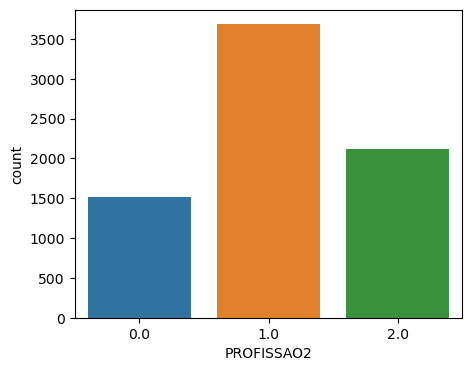

In [228]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['PROFISSAO2'] , ax=ax )

In [229]:
pd.crosstab( dados['PROFISSAO2'] , dados['MAU'] , normalize = 'index')

MAU,0,1
PROFISSAO2,,
0.0,0.725000,0.275000
1.0,0.698969,0.301031
2.0,0.669187,0.330813


---
- CEP:

<Axes: xlabel='CEP', ylabel='count'>

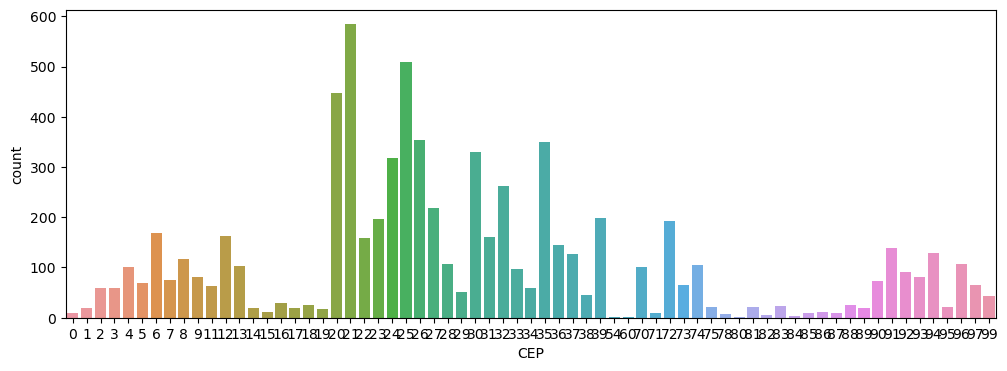

In [183]:
fig, ax = plt.subplots(figsize=(12,4))
sns.countplot(  x= dados['CEP'], ax=ax )

In [75]:
pd.crosstab( dados['CEP'] , dados['MAU'], normalize='index').sort_values(by=1)

MAU,0,1
CEP,,
71,1.000000,0.000000
60,1.000000,0.000000
54,1.000000,0.000000
84,1.000000,0.000000
87,0.888889,0.111111
...,...,...
80,0.500000,0.500000
0,0.500000,0.500000
38,0.488889,0.511111


In [76]:
pd.crosstab( dados['CEP'] , dados['MAU'], normalize='index').sort_values(by=1).index

Int64Index([71, 60, 54, 84, 87, 85, 73, 82, 21, 26, 24, 23, 22, 34,  9, 32, 36,
            81, 30, 20, 19, 83, 31, 35, 27, 33, 89,  6, 25,  5, 28, 95, 70, 39,
             4, 12, 74, 90, 99, 88, 97, 29, 91, 96,  8, 72, 94, 92, 16, 18,  3,
            37, 75, 93, 86,  2, 13,  7, 17,  1, 14, 11, 80,  0, 38, 78, 15],
           dtype='int64', name='CEP')

Regra agrupamento CEP:

In [79]:
grupo1_cep = pd.crosstab( dados['CEP'] , dados['MAU'], normalize='index').sort_values(by=1).index[:22]

In [80]:
print(grupo1_cep)

Int64Index([71, 60, 54, 84, 87, 85, 73, 82, 21, 26, 24, 23, 22, 34,  9, 32, 36,
            81, 30, 20, 19, 83],
           dtype='int64', name='CEP')


In [81]:
grupo2_cep = pd.crosstab( dados['CEP'] , dados['MAU'], normalize='index').sort_values(by=1).index[22:44]

In [82]:
print(grupo2_cep)

Int64Index([31, 35, 27, 33, 89,  6, 25,  5, 28, 95, 70, 39,  4, 12, 74, 90, 99,
            88, 97, 29, 91, 96],
           dtype='int64', name='CEP')


In [83]:
grupo3_cep = pd.crosstab( dados['CEP'] , dados['MAU'], normalize='index').sort_values(by=1).index[44:]

In [84]:
print(grupo3_cep)

Int64Index([ 8, 72, 94, 92, 16, 18,  3, 37, 75, 93, 86,  2, 13,  7, 17,  1, 14,
            11, 80,  0, 38, 78, 15],
           dtype='int64', name='CEP')


In [90]:
dados.loc[dados['CEP'].isin(grupo1_cep),'CEP2'] = 0
dados.loc[dados['CEP'].isin(grupo2_cep),'CEP2'] = 1
dados.loc[dados['CEP'].isin(grupo3_cep),'CEP2'] = 2

<Axes: xlabel='CEP2', ylabel='count'>

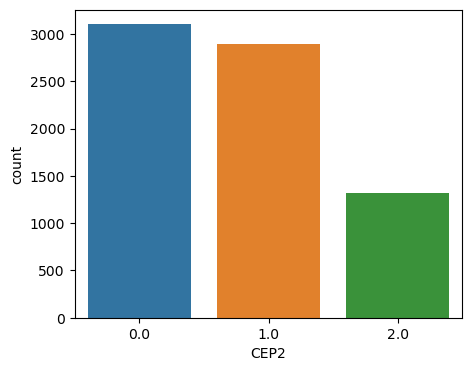

In [178]:
fig, ax = plt.subplots(figsize=(5,4))
sns.countplot(  x= dados['CEP2'], ax=ax )

In [102]:
pd.crosstab( dados['CEP2'] , dados['MAU'], normalize='index')

MAU,0,1
CEP2,,
0.0,0.750484,0.249516
1.0,0.683702,0.316298
2.0,0.593797,0.406203


---
### Transformação das features em dummies

Para facilitar o processo, optou-se por transformar todas as features candidatas em dummies.

In [265]:
colunas_finais = ['TPCLIENT','LOCALIZA2','TPEMPREG2','SEXO','ESTCIVIL2','SITRESID','LIMITE2','TEMPORES2','CEP2','PROFISSAO2','ANONASCI2','MAU']

In [274]:
dados_final = dados[colunas_finais]

In [281]:
dados_final.tail()

,TPCLIENT,LOCALIZA2,TPEMPREG2,SEXO,ESTCIVIL2,SITRESID,LIMITE2,TEMPORES2,CEP2,PROFISSAO2,ANONASCI2,MAU
7315,1,2.0,"(32.0, 130.0]",M,1.0,P,"(31.0, 118.0]","(4.0, 70.0]",1.0,2.0,"(63.0, 74.0]",1
7316,1,2.0,"(32.0, 130.0]",F,1.0,P,"(-0.001, 31.0]","(-0.001, 4.0]",1.0,2.0,"(63.0, 74.0]",0
7317,1,2.0,"(130.0, 628.0]",M,1.0,P,"(31.0, 118.0]","(-0.001, 4.0]",1.0,1.0,"(50.0, 63.0]",0
7318,1,2.0,"(-0.001, 32.0]",M,1.0,P,"(31.0, 118.0]","(4.0, 70.0]",1.0,0.0,"(63.0, 74.0]",0
7319,1,2.0,"(-0.001, 32.0]",M,0.0,A,"(31.0, 118.0]","(-0.001, 4.0]",1.0,0.0,"(74.0, 87.0]",1


In [279]:
dados_final['TPCLIENT'] = dados_final['TPCLIENT'].astype('category')
dados_final['LOCALIZA2'] = dados_final['LOCALIZA2'].astype('category')
dados_final['ESTCIVIL2'] = dados_final['ESTCIVIL2'].astype('category')
dados_final['CEP2'] = dados_final['CEP2'].astype('category')
dados_final['PROFISSAO2'] = dados_final['PROFISSAO2'].astype('category')

C:\Users\herli\AppData\Local\Temp\ipykernel_4380\2927854579.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_final['TPCLIENT'] = dados_final['TPCLIENT'].astype('category')
C:\Users\herli\AppData\Local\Temp\ipykernel_4380\2927854579.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_final['LOCALIZA2'] = dados_final['LOCALIZA2'].astype('category')
C:\Users\herli\AppData\Local\Temp\ipykernel_4380\2927854579.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

In [285]:
dados_final = pd.get_dummies( dados_final , drop_first=True)

In [283]:
pd.get_dummies( dados_final , drop_first=True).corr()

,MAU,TPCLIENT_2,LOCALIZA2_1.0,LOCALIZA2_2.0,"TPEMPREG2_(32.0, 130.0]","TPEMPREG2_(130.0, 628.0]",SEXO_M,ESTCIVIL2_1.0,ESTCIVIL2_2.0,SITRESID_P,"LIMITE2_(31.0, 118.0]","LIMITE2_(118.0, 99865.0]","TEMPORES2_(4.0, 70.0]",CEP2_1.0,CEP2_2.0,PROFISSAO2_1.0,PROFISSAO2_2.0,"ANONASCI2_(50.0, 63.0]","ANONASCI2_(63.0, 74.0]","ANONASCI2_(74.0, 87.0]"
MAU,1.000000,-0.120466,-0.001867,0.195547,-0.027201,-0.125534,0.068714,-0.072515,-0.042649,-0.052699,-0.005745,-0.072320,-0.040572,0.021214,0.104049,-0.007009,0.036836,-0.045070,0.007142,0.188128
TPCLIENT_2,-0.120466,1.000000,0.040143,-0.154698,0.137907,0.045157,-0.051900,0.033545,-0.016819,0.034693,-0.031620,0.231422,-0.098655,-0.074117,-0.151077,-0.010654,-0.002897,0.037568,0.015595,-0.088857
LOCALIZA2_1.0,-0.001867,0.040143,1.000000,-0.503069,-0.006301,0.007765,0.008748,-0.011748,-0.011770,0.015178,0.022378,0.000277,0.011876,0.187693,-0.122801,0.005253,0.017796,0.011775,0.004329,0.002873
LOCALIZA2_2.0,0.195547,-0.154698,-0.503069,1.000000,-0.030266,-0.055162,0.008059,-0.018965,-0.008074,-0.040230,0.012031,-0.060034,-0.000801,0.014837,0.364181,-0.002167,0.039311,-0.027096,0.007639,0.069267
"TPEMPREG2_(32.0, 130.0]",-0.027201,0.137907,-0.006301,-0.030266,1.000000,-0.573090,-0.043379,0.017040,-0.019243,0.027145,0.010656,0.014673,-0.008759,-0.003574,-0.035641,-0.000275,0.020920,-0.022180,0.083485,-0.036980
"TPEMPREG2_(130.0, 628.0]",-0.125534,0.045157,0.007765,-0.055162,-0.573090,1.000000,-0.049455,0.086236,0.134769,0.061450,-0.043084,0.110462,0.066396,-0.021822,-0.051627,0.026331,-0.048855,0.140392,-0.114738,-0.284141
SEXO_M,0.068714,-0.051900,0.008748,0.008059,-0.043379,-0.049455,1.000000,0.087043,-0.216470,-0.037728,-0.010767,0.036045,-0.014265,0.011718,0.024863,0.019284,0.037943,-0.040065,0.021996,0.131850
ESTCIVIL2_1.0,-0.072515,0.033545,-0.011748,-0.018965,0.017040,0.086236,0.087043,1.000000,-0.355312,0.036675,-0.031464,0.071126,0.014888,0.007551,-0.004221,0.006056,-0.010743,0.174126,0.062473,-0.296506
ESTCIVIL2_2.0,-0.042649,-0.016819,-0.011770,-0.008074,-0.019243,0.134769,-0.216470,-0.355312,1.000000,0.027614,0.015839,-0.012623,0.033364,0.017884,-0.011346,0.018062,-0.033863,-0.047123,-0.147904,-0.166653
SITRESID_P,-0.052699,0.034693,0.015178,-0.040230,0.027145,0.061450,-0.037728,0.036675,0.027614,1.000000,0.014197,0.000722,0.213440,0.026099,-0.080876,-0.005044,0.008179,0.011606,-0.017867,-0.068378


Como não há nenhuma variavel altamente correlacionada com alguma outra no banco de dados, optou-se por não realizar a exclusão de nennhuma dessas variáveis por esse motivo.

In [287]:
dados_final.to_csv("base_tratada.csv" , index=False)